# Aplicação da FFT no dataset Temperatures
fonte: https://pythontic.com/visualization/signals/fouriertransform_fft

*ToDo*
* ( )Entender a sampling frequency
* () Entender as variáveis tpCount e as seguintes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
city='Portland'
data = pd.read_csv('data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [3]:
data.head()

,Portland
datetime,
2012-10-01 13:00:00,282.080000
2012-10-01 14:00:00,282.083252
2012-10-01 15:00:00,282.091866
2012-10-01 16:00:00,282.100481
2012-10-01 17:00:00,282.109095


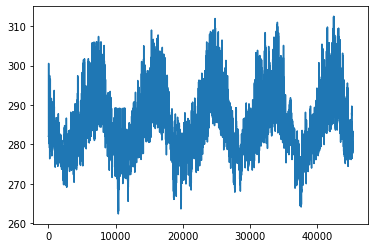

In [4]:
plt.plot([i for i in range(data.shape[0])], data[city])

In [5]:
magnitude = data[city]

# |?| Entender melhor a sampling frequency
samplingFrequency = len(magnitude)

In [6]:
fourierTransform = np.fft.fft(magnitude)

# Frequency domain representation
fourierTransform = np.fft.fft(magnitude)/len(magnitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(magnitude)/2))] # Exclude sampling frequency

tpCount     = len(magnitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

In [25]:
# Remover o primeiro valor, pois é 0 e gera ruído
frequencies = frequencies[1:]
fourierTransform = fourierTransform[1:]

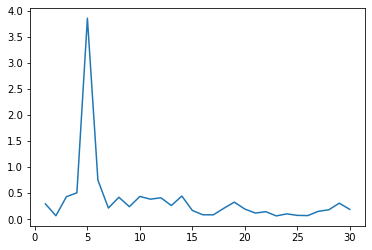

In [24]:
# Plotamos os valores absolutos da série de Fourier
plt.plot(frequencies[:30], abs(fourierTransform)[:30])


In [20]:
ordered_freqs = list(zip(frequencies, fourierTransform))

In [21]:
ordered_freqs[:10]

[(1.0, (-0.17962156547752536+0.23233273118926917j)),
 (2.0, (0.06601644840824791-0.006733649509023874j)),
 (3.0, (0.20625136006658865+0.37881945876601714j)),
 (4.0, (-0.12533987821464074+0.4911700259068571j)),
 (5.0, (-0.8458648035527344+3.764688901100609j)),
 (6.0, (0.13159975604632926-0.7399577494716308j)),
 (7.0, (-0.04407012574485535-0.2094970213208673j)),
 (8.0, (-0.06700581775778547-0.41613270606904446j)),
 (9.0, (0.1495653904834511-0.18816139895770734j)),
 (10.0, (-0.3838865819305446+0.20907173395531298j))]

# Ordered signals by frequency

In [22]:
sorted_by_freqs = sorted(ordered_freqs, key=lambda tup: tup[1])

In [23]:
print("frequency signal, fft")
for i, item in enumerate(sorted_by_freqs[:10]):
    print(i+1, ":", item)

frequency signal, fft
1 : (5.0, (-0.8458648035527344+3.764688901100609j))
2 : (1886.0, (-0.44100021187110705+1.0752020681143517j))
3 : (1880.0, (-0.4016291737271869-0.10707466554606748j))
4 : (10.0, (-0.3838865819305446+0.20907173395531298j))
5 : (1891.0, (-0.33622783249815846-0.21034456479993452j))
6 : (88.0, (-0.23958182617071078+0.029864415710588395j))
7 : (57.0, (-0.21578697840258848-0.08310784669244897j))
8 : (78.0, (-0.20497610894470328-0.05997271943649842j))
9 : (75.0, (-0.18329746640155928+0.004045394102329823j))
10 : (1.0, (-0.17962156547752536+0.23233273118926917j))
